##**Installing Libraries and Dependencies**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
from google.colab import files
import io
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report
import joblib

##**Upload Data Source**

In [4]:
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [15]:
data = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

## **Data Cleaning and Analyzing - Data Wrangling**

In [16]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [18]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [19]:
num_col = data.select_dtypes(include = np.number).columns
categ_col = data.select_dtypes(exclude = np.number).columns

print("\nNumerical Columns:\n", num_col)
print("\nCategorical Columns:\n", categ_col)


Numerical Columns:
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

Categorical Columns:
 Index(['Species'], dtype='object')


## **Exploratory Data Analysis - Data Visualization**

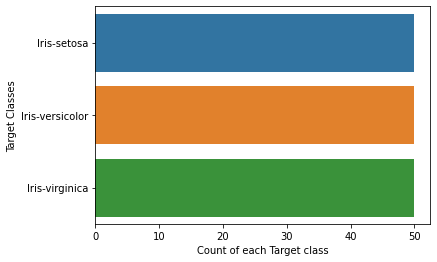

In [21]:
#Checking Distribution of Target Class
sns.countplot(y = data['Species'], data = data)
plt.xlabel('Count of each Target class')
plt.ylabel('Target Classes')
plt.show()

In [22]:
#Label Encoding of Categorical Data
lben = LabelEncoder()
data['IrisSpecies'] = lben.fit_transform(data['Species'])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,IrisSpecies
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [23]:
num_col = data.select_dtypes(include = np.number).columns
categ_col = data.select_dtypes(exclude = np.number).columns

print("\nNumerical Columns:\n", num_col)
print("\nCategorical Columns:\n", categ_col)


Numerical Columns:
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'IrisSpecies'],
      dtype='object')

Categorical Columns:
 Index(['Species'], dtype='object')


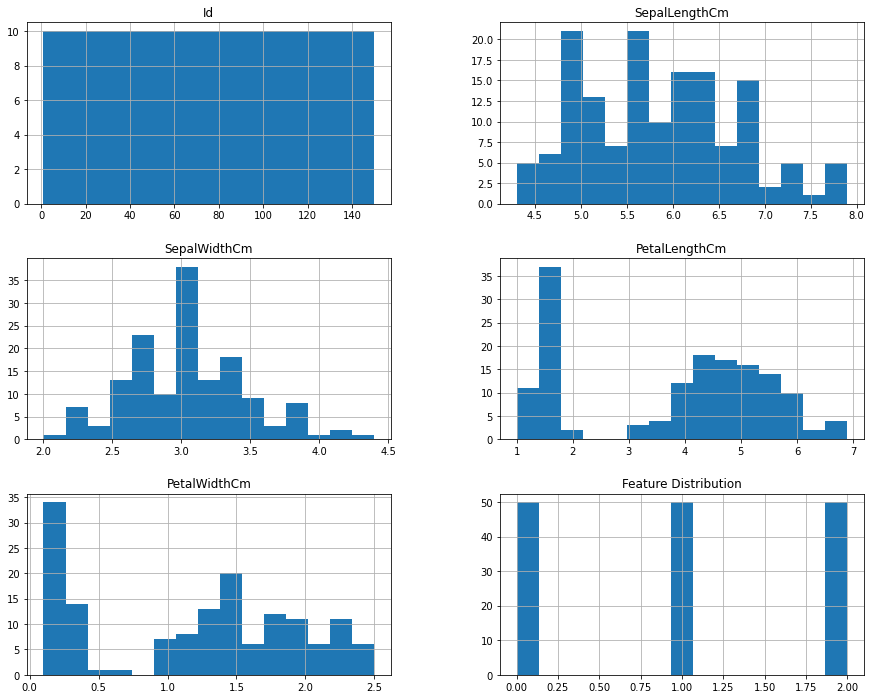

In [24]:
# Check distribution of all features.
data.hist(figsize = (15, 12), bins = 15)
plt.title('Feature Distribution')
plt.show()

## **Splitting Data into Train and Test**

In [28]:
X = data[['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']]
y = data[['IrisSpecies']] 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1050)

## ***Model Building***

### ***Decision Tree Classifier with Criterion - GINI***

In [30]:
dtclassifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 50, random_state = 1050)
dtclassifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1050, splitter='best')

In [31]:
prediction = dtclassifier.predict(X_test)
actual = y_test

##***Model Diagnosis***

In [32]:
def mean_absolute_percentage_error(actual, prediction):
    actual, prediction = np.array(actual), np.array(prediction)
    return (np.mean(np.abs(actual - prediction) / actual) * 100)

In [33]:
def model_evaluation(y_test, y_pred):
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred))
    print("\n Classification Report:\n ", classification_report(y_test, y_pred))
    print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [34]:
accuracy_score(actual, prediction)

0.9473684210526315

## ***Model Evaluation***

In [35]:
model_evaluation(actual, prediction)

Mean Squared Error: 0.05263157894736842
Mean Absolute Error: 0.05263157894736842
Mean Absolute Percentage Error: nan

 Classification Report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93        14
           2       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38


 Confusion Matrix:
 [[11  0  0]
 [ 0 14  0]
 [ 0  2 11]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


### ***Decision Tree Classifier with GridSearchCV for parameters***

In [36]:
clf = DecisionTreeClassifier()
param = {'criterion' : ['entropy', 'gini'],
         'splitter' : ['random', 'best'],
         'max_depth' : [5,10,15,20] }

In [37]:
grid = GridSearchCV(estimator = clf, param_grid=param, verbose = 0, refit = True)

In [38]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                

In [53]:
grid.best_params_
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
grid.best_score_

0.9557312252964426

In [59]:
joblib.dump(grid, 'DTmodel_iris')

['DTmodel_iris']